# Boiler Plate

In [1]:
library(tidyverse)
library(knitr)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
# theme to add to all plots
# theme_set(theme_bw(base_size = 20))
# library(tidyverse)
theme_set(theme_classic(base_size = 25))

In [3]:
packageurl<-"https://cran.r-project.org/src/contrib/Archive/nloptr/nloptr_1.2.1.tar.gz"

install.packages(packageurl, repos=NULL, type="source")
install.packages("infotheo")
install.packages("lme4")
library(infotheo)
library(lme4)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘minqa’, ‘Rcpp’, ‘RcppEigen’


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack




# Experiment 1a: Viewing Same-Different


In [110]:
#filter out fillers 
memory_data_viewing_SD <- read.csv("memory_data_viewing_SD.csv")%>% 
filter(Change_type != "No Change") %>%
mutate(Change_type.fct = as.factor(Change_type)) 

In [111]:
#take a look at overall accuracy
memory_data_viewing_SD %>% filter(Change_type != "No Change") %>% 
summarize(n=n(), n_correct = sum(Correct), accuracy = sum(n_correct/n)) %>% kable



|    n| n_correct|  accuracy|
|----:|---------:|---------:|
| 1280|       446| 0.3484375|

In [112]:
accuracy_by_participant_1a <- memory_data_viewing_SD %>% filter(Change_type != "No Change") %>% group_by( exp, participant, Change_type) %>% 
summarize(n=n(),  accuracy = sum(sum(Correct)/n)) %>%
mutate(Role= ifelse(Change_type == "Goal Change", "Goal", "Source")) %>% select(-Change_type)
accuracy_by_participant_1a %>% kable
accuracy_by_participant_1a %>% group_by(Role) %>% summarize (mean = mean(accuracy), sd= sd(accuracy)) %>% kable

`summarise()` has grouped output by 'exp', 'participant'. You can override
using the `.groups` argument.




|exp   | participant|  n| accuracy|Role   |
|:-----|-----------:|--:|--------:|:------|
|exp1a |           1|  8|    0.375|Goal   |
|exp1a |           1|  8|    0.250|Source |
|exp1a |           2|  8|    0.125|Goal   |
|exp1a |           2|  8|    0.250|Source |
|exp1a |           3|  8|    0.125|Goal   |
|exp1a |           3|  8|    0.250|Source |
|exp1a |           4|  8|    0.625|Goal   |
|exp1a |           4|  8|    0.500|Source |
|exp1a |           5|  8|    0.500|Goal   |
|exp1a |           5|  8|    0.625|Source |
|exp1a |           6|  8|    0.500|Goal   |
|exp1a |           6|  8|    0.375|Source |
|exp1a |           7|  8|    0.375|Goal   |
|exp1a |           7|  8|    0.375|Source |
|exp1a |           8|  8|    0.125|Goal   |
|exp1a |           8|  8|    0.625|Source |
|exp1a |           9|  8|    0.125|Goal   |
|exp1a |           9|  8|    0.000|Source |
|exp1a |          10|  8|    0.250|Goal   |
|exp1a |          10|  8|    0.250|Source |
|exp1a |          11|  8|    0



|Role   |      mean|        sd|
|:------|---------:|---------:|
|Goal   | 0.4140625| 0.2246602|
|Source | 0.2828125| 0.2045214|

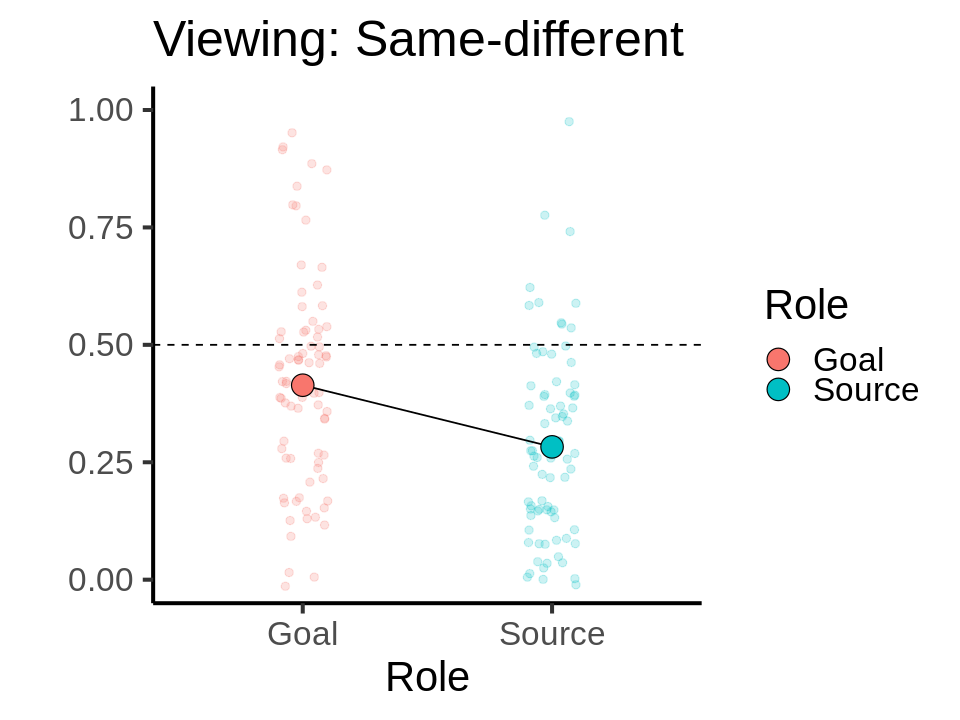

In [113]:
options(repr.plot.width = 8, repr.plot.height = 6)
accuracy_by_participant_1a %>% 
ggplot(aes(Role, accuracy)) +
# geom_bar(stat = "summary", position = position_dodge())+
# facet_wrap(.~audio_prompt, labeller = as_labeller(facet_names))+
# facet_wrap(.~Is_mentioned, labeller = as_labeller(facet_names))+
geom_point(aes(color = Role), position = position_jitter(0.1), size = 2, alpha = 0.2)+
# geom_line(aes(group = ID))+
geom_hline(yintercept = 0.5, linetype = 2)+
# stat_summary(fun.data = mean_se,  geom = "errorbar", width = 0.2, size = 1, 
#                           position = position_dodge(0.9))    +
stat_summary(fun="mean", geom="path", aes(group=1))+
stat_summary(aes(fill = Role), fun = "mean",  geom = "point", size = 6, shape = 21, color = "black")    +
# geom_bar(stat = "identity", position = "dodge", width = 1, color="black", alpha =0.8)+
coord_cartesian(ylim = c(0,1))+
labs(x="Role", y = "", title = "Viewing: Same-different")
# scale_fill_brewer(palette = "Dark2", direction = 1)
# geom_histogram(stat = "identity", position = "fill", width = 1)

In [114]:
contrasts(memory_data_viewing_SD$Change_type.fct) = contr.sum(2)
m<- glmer(Correct ~ Change_type.fct + (1 + Change_type.fct|participant) + (1 + Change_type.fct|Event_type) , family = "binomial", data = memory_data_viewing_SD)
summary(m)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Correct ~ Change_type.fct + (1 + Change_type.fct | participant) +  
    (1 + Change_type.fct | Event_type)
   Data: memory_data_viewing_SD

     AIC      BIC   logLik deviance df.resid 
  1552.9   1594.1   -768.4   1536.9     1272 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.6908 -0.6550 -0.4524  0.8533  3.7155 

Random effects:
 Groups      Name             Variance Std.Dev. Corr
 participant (Intercept)      0.49662  0.7047       
             Change_type.fct1 0.08228  0.2868   0.05
 Event_type  (Intercept)      0.38053  0.6169       
             Change_type.fct1 0.02061  0.1436   0.37
Number of obs: 1280, groups:  participant, 80; Event_type, 16

Fixed effects:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -0.76256    0.18617  -4.096 4.20e-05 ***
Change_type.fct1  0.33496    0.08354   4.009 6.09e-05 ***


#  Experiment 1b: Viewing Forced-Choice




In [115]:
memory_viewing_FC <- read_csv('memory_data_viewing_FC.csv') 

Rows: 1120 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): exp, Phase, viewingList, Event_Type, Event_type, Choice, Answer
dbl (5): Trial_number, participant, Correct, Source_Correct, Goal_Correct

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [116]:
#calculate appendix
appendix_t1<- memory_viewing_FC %>% 
# select (Phase, viewingList, participant, Event_Type, Event_type, Choice, Answer, Correct, Source_Correct, Goal_Correct) %>%
filter(Event_Type!="Filler")%>%
mutate (Type = ifelse(Correct == 1, "Both Correct", ifelse(Source_Correct ==1, "Source Correct", ifelse(Goal_Correct==1, "Goal Correct", "Neither Correct")))) 
appendix_t1 %>% group_by(Type) %>% summarize(n = n(), percent = n/640*100)%>% kable



|Type            |   n|  percent|
|:---------------|---:|--------:|
|Both Correct    | 316| 49.37500|
|Goal Correct    | 120| 18.75000|
|Neither Correct |  83| 12.96875|
|Source Correct  | 121| 18.90625|

In [117]:
#create "longer form", prepare for the logistic mixed-effect model
memory_viewing_FC_longer <- memory_viewing_FC %>% 
filter(Event_Type == "Critical") %>% 
pivot_longer(c(Source_Correct, Goal_Correct), names_to = "role", values_to = "Is_correct") %>%
mutate(Role = ifelse(role == "Source_Correct", "Source", "Goal"))%>%
select(-role)%>%
mutate(Role_fact=factor(Role, levels= c("Goal", "Source")))

In [118]:
accuracy_by_participant_1b <- memory_viewing_FC_longer %>% group_by(exp, participant, Role) %>% summarize(n=n(), accuracy = sum(Is_correct,na.rm = TRUE)/n) 
accuracy_by_participant_1b %>% kable

`summarise()` has grouped output by 'exp', 'participant'. You can override
using the `.groups` argument.




|exp   | participant|Role   |  n| accuracy|
|:-----|-----------:|:------|--:|--------:|
|exp1b |           1|Goal   | 16|   0.8125|
|exp1b |           1|Source | 16|   0.8750|
|exp1b |           2|Goal   | 16|   0.6250|
|exp1b |           2|Source | 16|   0.8125|
|exp1b |           3|Goal   | 16|   0.6875|
|exp1b |           3|Source | 16|   0.8125|
|exp1b |           4|Goal   | 16|   1.0000|
|exp1b |           4|Source | 16|   0.9375|
|exp1b |           5|Goal   | 16|   0.8125|
|exp1b |           5|Source | 16|   0.8750|
|exp1b |           6|Goal   | 16|   0.5000|
|exp1b |           6|Source | 16|   0.6250|
|exp1b |           7|Goal   | 16|   0.6250|
|exp1b |           7|Source | 16|   0.6250|
|exp1b |           8|Goal   | 16|   0.5000|
|exp1b |           8|Source | 16|   0.6250|
|exp1b |           9|Goal   | 16|   0.5000|
|exp1b |           9|Source | 16|   0.5000|
|exp1b |          10|Goal   | 16|   0.6875|
|exp1b |          10|Source | 16|   0.6875|
|exp1b |          11|Goal   | 

In [120]:
accuracy_by_participant_1b %>% group_by(Role) %>% summarize(mean = mean(accuracy), sd= sd(accuracy)) %>% kable



|Role   |      mean|        sd|
|:------|---------:|---------:|
|Goal   | 0.6812500| 0.1655411|
|Source | 0.6828125| 0.1694800|

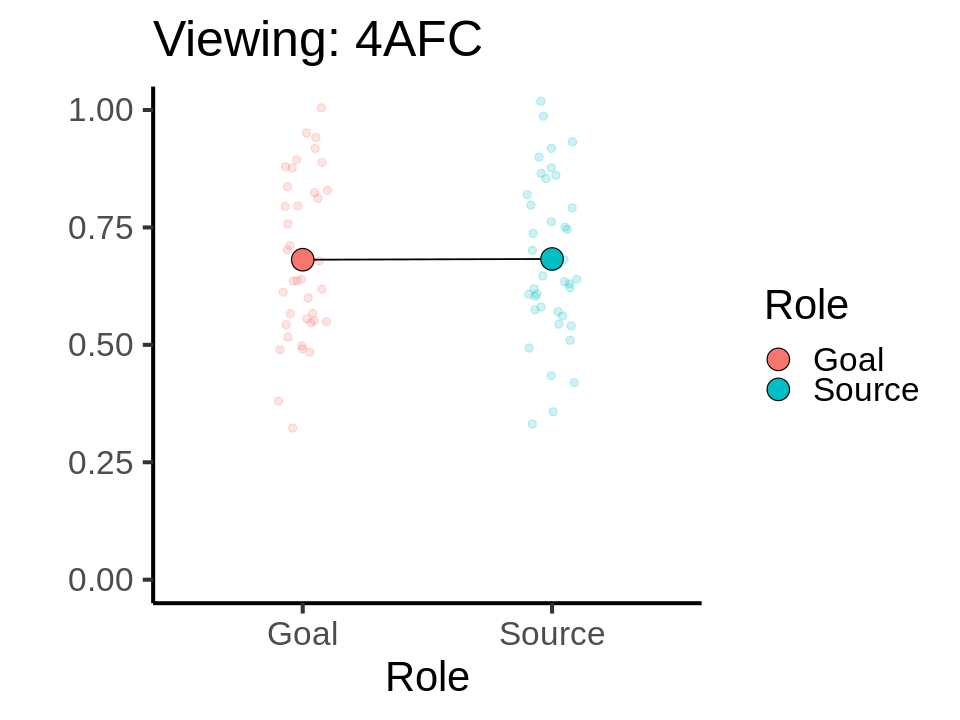

In [121]:
options(repr.plot.width = 8, repr.plot.height = 6)
accuracy_by_participant_1b %>% 
ggplot(aes(Role, accuracy)) +
geom_point(aes(color = Role), position = position_jitter(0.1), size = 2, alpha = 0.2)+
stat_summary(fun="mean", geom="path", aes(group=1))+
stat_summary(aes(fill = Role), fun = "mean",  geom = "point", size = 6, shape = 21, color = "black")    +
coord_cartesian(ylim = c(0,1))+
labs(x="Role", y = "", title = "Viewing: 4AFC")

In [122]:
contrasts(memory_viewing_FC_longer$Role_fact) <- contr.sum(2)
m<- glmer(Is_correct ~ Role_fact + (1|participant) + (1|Event_type), family = "binomial", data = memory_viewing_FC_longer)
summary(m)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Is_correct ~ Role_fact + (1 | participant) + (1 | Event_type)
   Data: memory_viewing_FC_longer

     AIC      BIC   logLik deviance df.resid 
  1554.5   1575.1   -773.3   1546.5     1276 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1272 -1.0861  0.4804  0.7115  1.1274 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.4829   0.6949  
 Event_type  (Intercept) 0.0353   0.1879  
Number of obs: 1280, groups:  participant, 40; Event_type, 16

Fixed effects:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.856974   0.136633   6.272 3.56e-10 ***
Role_fact1  -0.003945   0.062566  -0.063     0.95    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
           (Intr)
Role_fact1 -0.001

# Experiment 2a: Production Same-Different


In [123]:
memory_and_production <- read.csv("memory_production_SD.csv") %>%
filter(Change_type != "No Change") %>%
mutate(Change_type.fct = factor(Change_type, levels = c("Goal Change", "Source Change"))) %>%
mutate(Role = ifelse(Change_type == "Source Change", "Source", "Goal")) %>%
mutate(Role.fct = factor(Role, levels = c("Goal", "Source"))) %>% 
mutate(Change_role_mentioned.fct = factor(Change_role_mentioned, levels = c(1,0))) %>%
mutate(Source_mentioned.fct = factor(Source_mentioned, levels = c(1,0)))

In [124]:
accuracy_by_participant_2a<- memory_and_production %>% group_by(exp, participant, Role) %>% summarize(n=n(), accuracy = sum(sum(Correct)/n)) 
accuracy_by_participant_2a %>% kable
accuracy_by_participant_2a %>% group_by(Role) %>% summarize (mean= mean(accuracy), sd= sd(accuracy)) %>% kable

`summarise()` has grouped output by 'exp', 'participant'. You can override
using the `.groups` argument.




|exp   | participant|Role   |  n| accuracy|
|:-----|-----------:|:------|--:|--------:|
|exp2a |           1|Goal   |  8|    0.500|
|exp2a |           1|Source |  8|    0.375|
|exp2a |           2|Goal   |  8|    0.625|
|exp2a |           2|Source |  8|    0.625|
|exp2a |           3|Goal   |  8|    0.750|
|exp2a |           3|Source |  8|    0.875|
|exp2a |           4|Goal   |  8|    0.125|
|exp2a |           4|Source |  8|    0.000|
|exp2a |           5|Goal   |  8|    0.875|
|exp2a |           5|Source |  8|    0.750|
|exp2a |           6|Goal   |  8|    0.625|
|exp2a |           6|Source |  8|    0.500|
|exp2a |           7|Goal   |  8|    0.750|
|exp2a |           7|Source |  8|    0.375|
|exp2a |           8|Goal   |  8|    0.875|
|exp2a |           8|Source |  8|    0.750|
|exp2a |           9|Goal   |  8|    0.500|
|exp2a |           9|Source |  8|    0.625|
|exp2a |          10|Goal   |  8|    0.375|
|exp2a |          10|Source |  8|    0.250|
|exp2a |          11|Goal   | 



|Role   |      mean|        sd|
|:------|---------:|---------:|
|Goal   | 0.4567308| 0.2214428|
|Source | 0.3669872| 0.2326266|

`summarise()` has grouped output by 'participant', 'Role'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'Role'. You can override using the
`.groups` argument.




|Role   | Source_mentioned|      mean|        sd|
|:------|----------------:|---------:|---------:|
|Goal   |                0| 0.3518116| 0.3689673|
|Goal   |                1| 0.4403822| 0.2838019|
|Source |                0| 0.2438261| 0.2944113|
|Source |                1| 0.3924127| 0.2694192|

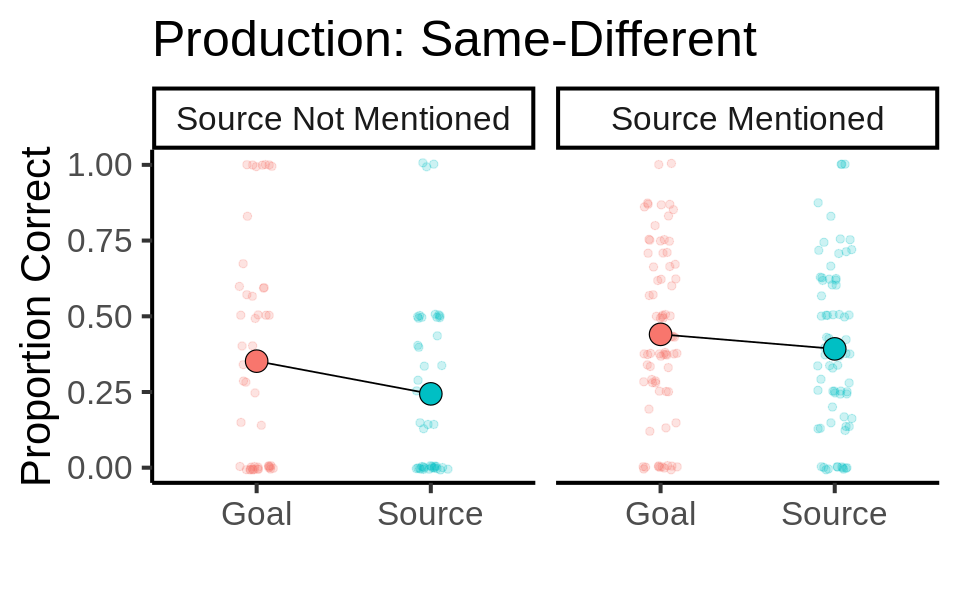

In [125]:
accuracy_by_Source_mentioned <- memory_and_production  %>% select(participant, Event_type, Role, Correct, Goal_mentioned, Source_mentioned) %>% 
group_by( participant, Role, Source_mentioned) %>% summarize(n=n(), n_correct = sum(Correct), accuracy = n_correct/n)  

accuracy_by_Source_mentioned %>% group_by(Role, Source_mentioned) %>% summarize(mean =mean(accuracy), sd = sd(accuracy)) %>% kable

facet_names <- c(
                    '0' = "Source Not Mentioned",
                    '1' = "Source Mentioned"
                    )

options(repr.plot.width = 8, repr.plot.height = 5)
accuracy_by_Source_mentioned %>% 
ggplot(aes(Role, accuracy)) +
facet_wrap(.~Source_mentioned, labeller = as_labeller(facet_names))+
geom_point(aes(color = Role), position = position_jitter(0.1), size = 2, alpha = 0.2)+
stat_summary(fun="mean", geom="path", aes(group=1))+
stat_summary(aes(fill = Role), fun = "mean",  geom = "point", size = 6, shape = 21, color = "black")    +
coord_cartesian(ylim = c(0,1))+
theme(legend.position = "none")+
labs(x="", y = "Proportion Correct", title = "Production: Same-Different")

In [126]:
contrasts(memory_and_production$Change_type.fct) = contr.sum(2)
contrasts(memory_and_production$Source_mentioned.fct) = contr.sum(2)
m<- glmer(Correct ~ Change_type.fct * Source_mentioned.fct  + (1|participant) + (1|Event_type) , family = "binomial", data = memory_and_production, control=glmerControl(optimizer= "nloptwrap",
                            optCtrl=list(maxfun=2e7)))
summary(m)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: 
Correct ~ Change_type.fct * Source_mentioned.fct + (1 | participant) +  
    (1 | Event_type)
   Data: memory_and_production
Control: glmerControl(optimizer = "nloptwrap", optCtrl = list(maxfun = 2e+07))

     AIC      BIC   logLik deviance df.resid 
  1482.3   1513.1   -735.2   1470.3     1242 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2217 -0.6899 -0.3449  0.7167  4.1513 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.9255   0.9620  
 Event_type  (Intercept) 0.8365   0.9146  
Number of obs: 1248, groups:  participant, 78; Event_type, 16

Fixed effects:
                                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)                            -0.65388    0.26919  -2.429 0.015137 *  
Change_type.fct1                        0.27434    0.08254   3.324 0.000888 ***
Sour

In [127]:
production_longer_2a <- memory_and_production %>% 
select (exp, participant, Event_type, Source_mentioned, Goal_mentioned) %>%
pivot_longer(c(Source_mentioned, Goal_mentioned), names_to = "role", values_to = "Is_mentioned")%>%
mutate(Role = ifelse(role == "Source_mentioned", "Source", "Goal")) %>%
mutate(Role.fct = factor(Role, levels = c("Goal", "Source")))%>%
select(-role)

contrasts(production_longer_2a$Role.fct) = contr.sum(2)
m<- glmer(Is_mentioned ~ Role.fct + (1 |participant) + (1|Event_type) , family = "binomial", data = production_longer_2a)
summary(m)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Is_mentioned ~ Role.fct + (1 | participant) + (1 | Event_type)
   Data: production_longer_2a

     AIC      BIC   logLik deviance df.resid 
  1437.8   1461.1   -714.9   1429.8     2492 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-11.5403   0.0540   0.1374   0.3043   4.0274 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 4.3633   2.089   
 Event_type  (Intercept) 0.7903   0.889   
Number of obs: 2496, groups:  participant, 78; Event_type, 16

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.19944    0.35148   9.103   <2e-16 ***
Role.fct1    1.09050    0.08532  12.781   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
Role.fct1 0.180 

In [128]:
contrasts(production_longer_2a$Role.fct) = contr.sum(2)
m<- glmer(Is_mentioned ~ Role.fct + (1 +Role.fct |participant) + (1 +Role.fct|Event_type) , family = "binomial", data = production_longer_2a)
summary(m)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Is_mentioned ~ Role.fct + (1 + Role.fct | participant) + (1 +  
    Role.fct | Event_type)
   Data: production_longer_2a

     AIC      BIC   logLik deviance df.resid 
  1407.1   1453.7   -695.5   1391.1     2488 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-7.7301  0.0829  0.1513  0.2777  6.3233 

Random effects:
 Groups      Name        Variance Std.Dev. Corr 
 participant (Intercept) 3.94444  1.9861        
             Role.fct1   0.50429  0.7101   -0.83
 Event_type  (Intercept) 0.95732  0.9784        
             Role.fct1   0.05254  0.2292   0.05 
Number of obs: 2496, groups:  participant, 78; Event_type, 16

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   3.0509     0.3572   8.541  < 2e-16 ***
Role.fct1     0.6612     0.1586   4.168 3.07e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 

# Experiment 2b: Production Forced-Choice

---



In [129]:
#calculate appendix 2b
memory_and_production_FC <- read.csv("memory_production_FC.csv") %>% 
# select (Phase, Event_Type, Event_type, Value, Answer, Correct, Source_Correct, Goal_Correct) %>%
filter(Event_Type!= "Filler")%>%
mutate (Type = ifelse(Correct == 1, "Both Correct", ifelse(Source_Correct ==1, "Source Correct", ifelse(Goal_Correct==1, "Goal Correct", "Neither Correct")))) 

memory_and_production_FC %>% group_by(Type) %>% summarize(n = n(), percent= n/624*100)%>% kable



|Type            |   n|   percent|
|:---------------|---:|---------:|
|Both Correct    | 424| 67.948718|
|Goal Correct    |  81| 12.980769|
|Neither Correct |  17|  2.724359|
|Source Correct  | 102| 16.346154|

In [130]:
memory_and_production_FC_longer <- memory_and_production_FC %>% 
pivot_longer(c(Source_Correct, Goal_Correct), names_to = "role", values_to = "Is_correct") %>%
mutate(Role = ifelse(role == "Source_Correct", "Source", "Goal")) %>%
mutate(Role.fct = factor(Role, levels = c("Goal", "Source"))) %>%
mutate(Source_mentioned.fct = factor(Source_mentioned, levels = c("1", "0")))

In [131]:
accuracy_by_participant_2b <- memory_and_production_FC_longer %>% group_by(exp, participant, Role) %>% summarize(n=n(), accuracy = sum(Is_correct,na.rm = TRUE)/n) 
accuracy_by_participant_2b %>% kable

`summarise()` has grouped output by 'exp', 'participant'. You can override
using the `.groups` argument.




|exp   | participant|Role   |  n| accuracy|
|:-----|-----------:|:------|--:|--------:|
|exp2b |           1|Goal   | 16|   0.8750|
|exp2b |           1|Source | 16|   0.8750|
|exp2b |           2|Goal   | 16|   0.9375|
|exp2b |           2|Source | 16|   0.7500|
|exp2b |           3|Goal   | 16|   0.8125|
|exp2b |           3|Source | 16|   0.8125|
|exp2b |           4|Goal   | 16|   0.8125|
|exp2b |           4|Source | 16|   0.8750|
|exp2b |           5|Goal   | 16|   0.8125|
|exp2b |           5|Source | 16|   1.0000|
|exp2b |           6|Goal   | 16|   0.9375|
|exp2b |           6|Source | 16|   0.9375|
|exp2b |           7|Goal   | 16|   0.8125|
|exp2b |           7|Source | 16|   0.5000|
|exp2b |           8|Goal   | 16|   1.0000|
|exp2b |           8|Source | 16|   0.9375|
|exp2b |           9|Goal   | 16|   1.0000|
|exp2b |           9|Source | 16|   1.0000|
|exp2b |          10|Goal   | 16|   0.8750|
|exp2b |          10|Source | 16|   0.9375|
|exp2b |          11|Goal   | 

In [132]:
accuracy_by_Source_mentioned <- memory_and_production_FC_longer  %>% 
group_by(participant, Role, Source_mentioned) %>% summarize(n=n(), n_correct = sum(Is_correct), accuracy = n_correct/n)  
accuracy_by_Source_mentioned%>% kable

accuracy_by_Source_mentioned %>% group_by(Role, Source_mentioned) %>% summarize(mean =mean(accuracy), sd = sd(accuracy)) %>% kable

`summarise()` has grouped output by 'participant', 'Role'. You can override
using the `.groups` argument.




| participant|Role   | Source_mentioned|  n| n_correct|  accuracy|
|-----------:|:------|----------------:|--:|---------:|---------:|
|           1|Goal   |                0|  4|         4| 1.0000000|
|           1|Goal   |                1| 12|        10| 0.8333333|
|           1|Source |                0|  4|         3| 0.7500000|
|           1|Source |                1| 12|        11| 0.9166667|
|           2|Goal   |                0|  1|         1| 1.0000000|
|           2|Goal   |                1| 15|        14| 0.9333333|
|           2|Source |                0|  1|         0| 0.0000000|
|           2|Source |                1| 15|        12| 0.8000000|
|           3|Goal   |                0|  6|         4| 0.6666667|
|           3|Goal   |                1| 10|         9| 0.9000000|
|           3|Source |                0|  6|         5| 0.8333333|
|           3|Source |                1| 10|         8| 0.8000000|
|           4|Goal   |                1| 16|        13| 0.81

`summarise()` has grouped output by 'Role'. You can override using the
`.groups` argument.




|Role   | Source_mentioned|      mean|        sd|
|:------|----------------:|---------:|---------:|
|Goal   |                0| 0.8412780| 0.2412187|
|Goal   |                1| 0.8178942| 0.1193587|
|Source |                0| 0.7343237| 0.2871786|
|Source |                1| 0.8795877| 0.1159740|

In [133]:
facet_names <- c(
                    '0' = "Source Not Mentioned",
                    '1' = "Source Mentioned"
                    )


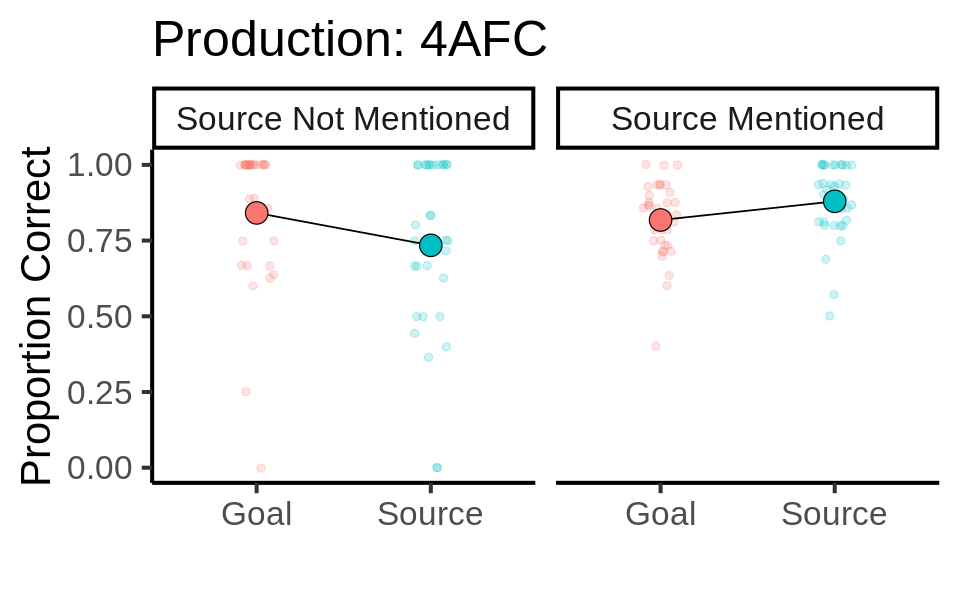

In [134]:
options(repr.plot.width = 8, repr.plot.height = 5)
accuracy_by_Source_mentioned %>% 
ggplot(aes(Role, accuracy)) +
# geom_bar(stat = "summary", position = position_dodge())+
# facet_wrap(.~Type)+
facet_wrap(.~Source_mentioned, labeller = as_labeller(facet_names))+
geom_point(aes(color = Role), position = position_jitter(0.1), size = 2, alpha = 0.2)+
# geom_line(aes(group = ID))+
# geom_hline(yintercept = 0.5, linetype = 2)+
# stat_summary(fun.data = mean_se,  geom = "errorbar", width = 0.2, size = 1, 
                          # position = position_dodge(0.9))    +
stat_summary(fun="mean", geom="path", aes(group=1))+
stat_summary(aes(fill = Role), fun = "mean",  geom = "point", size = 6, shape = 21, color = "black")    +
# geom_bar(stat = "identity", position = "dodge", width = 1, color="black", alpha =0.8)+
coord_cartesian(ylim = c(0,1))+
theme(legend.position = "none")+
labs(x="", y = "Proportion Correct", title = "Production: 4AFC")
# scale_fill_brewer(palette = "Dark2", direction = 1)
# geom_histogram(stat = "identity", position = "fill", width = 1)

In [135]:
contrasts(memory_and_production_FC_longer$Role.fct) = contr.sum(2)
contrasts(memory_and_production_FC_longer$Source_mentioned.fct) = contr.sum(2)
m<- glmer(Is_correct ~ Role.fct * Source_mentioned.fct + (1 + Role.fct|participant) + (1 + Role.fct|Event_type) , family = "binomial", data = memory_and_production_FC_longer, control=glmerControl(optimizer="bobyqa",
                            optCtrl=list(maxfun=2e5)))
summary(m)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Is_correct ~ Role.fct * Source_mentioned.fct + (1 + Role.fct |  
    participant) + (1 + Role.fct | Event_type)
   Data: memory_and_production_FC_longer
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 2e+05))

     AIC      BIC   logLik deviance df.resid 
  1088.2   1139.5   -534.1   1068.2     1238 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.3368  0.2438  0.3358  0.4534  1.9130 

Random effects:
 Groups      Name        Variance Std.Dev. Corr
 participant (Intercept) 0.21712  0.4660       
             Role.fct1   0.03905  0.1976   0.32
 Event_type  (Intercept) 0.43475  0.6594       
             Role.fct1   0.02846  0.1687   0.96
Number of obs: 1248, groups:  participant, 39; Event_type, 16

Fixed effects:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                      1.5

In [136]:
production_longer_FC <- memory_and_production_FC_longer %>% 
select (exp, participant, Event_type, Source_mentioned, Goal_mentioned) %>%
pivot_longer(c(Source_mentioned, Goal_mentioned), names_to = "role", values_to = "Is_mentioned")%>%
mutate(Role = ifelse(role == "Source_mentioned", "Source", "Goal")) %>%
mutate(Role.fct = factor(Role, levels = c("Goal", "Source")))%>%
select(-role) %>% distinct()

In [137]:
contrasts(production_longer_FC$Role.fct) = contr.sum(2)
m<- glmer(Is_mentioned ~ Role.fct + (1 |participant) + (1|Event_type) , family = "binomial", data = production_longer_FC)
summary(m)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Is_mentioned ~ Role.fct + (1 | participant) + (1 | Event_type)
   Data: production_longer_FC

     AIC      BIC   logLik deviance df.resid 
   767.2    787.7   -379.6    759.2     1244 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-12.0036   0.0828   0.1799   0.3290   2.6216 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 3.4102   1.847   
 Event_type  (Intercept) 0.4597   0.678   
Number of obs: 1248, groups:  participant, 39; Event_type, 16

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   2.8138     0.3754   7.495 6.62e-14 ***
Role.fct1     0.9796     0.1151   8.508  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
Role.fct1 0.199 

In [138]:
contrasts(production_longer_FC$Role.fct) = contr.sum(2)
m<- glmer(Is_mentioned ~ Role.fct + (1 + Role.fct|participant) + (1+ Role.fct|Event_type) , family = "binomial", data = production_longer_FC)
summary(m)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Is_mentioned ~ Role.fct + (1 + Role.fct | participant) + (1 +  
    Role.fct | Event_type)
   Data: production_longer_FC

     AIC      BIC   logLik deviance df.resid 
   772.7    813.8   -378.4    756.7     1240 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-10.1200   0.0700   0.1741   0.3262   2.2287 

Random effects:
 Groups      Name        Variance Std.Dev. Corr
 participant (Intercept) 3.59101  1.8950       
             Role.fct1   0.06535  0.2556   0.28
 Event_type  (Intercept) 0.63255  0.7953       
             Role.fct1   0.10294  0.3208   0.74
Number of obs: 1248, groups:  participant, 39; Event_type, 16

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   2.9597     0.4328   6.839 7.98e-12 ***
Role.fct1     1.1422     0.2414   4.732 2.22e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 

# Experiment 3a: Comprehension Same-Different


In [139]:
memory_and_comprehension <- read_csv('memory_comprehension_SD.csv') %>%
filter(Change_type != "No Change") %>%
mutate(change_role_mentioned = ifelse(Change_type == audio_prompt_transformed, 1, 0)) %>%
mutate(change_role_mentioned.fct = factor(change_role_mentioned, levels = c(1,0))) %>%
mutate(Change_type.fct = factor(Change_type, levels = c("Goal Change", "Source Change"))) 

Rows: 2184 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): exp, ViewingList, Phase, Event_Type, Change_type, Choice, Answer, ...
dbl  (3): Trial_number, participant, Correct

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [140]:
accuracy_by_participant_3a <- memory_and_comprehension %>% filter(Change_type != "No Change") %>% group_by( exp, participant, Change_type) %>% 
summarize(n=n(),  accuracy = sum(sum(Correct)/n)) %>%
mutate(Role= ifelse(Change_type == "Goal Change", "Goal", "Source")) %>% select(-Change_type)
accuracy_by_participant_3a %>% kable
accuracy_by_participant_3a %>% group_by(Role) %>% summarize (mean = mean(accuracy), sd= sd(accuracy)) %>% kable

`summarise()` has grouped output by 'exp', 'participant'. You can override
using the `.groups` argument.




|exp   | participant|  n| accuracy|Role   |
|:-----|-----------:|--:|--------:|:------|
|exp3a |           1|  8|    0.500|Goal   |
|exp3a |           1|  8|    0.375|Source |
|exp3a |           2|  8|    0.125|Goal   |
|exp3a |           2|  8|    0.000|Source |
|exp3a |           3|  8|    0.250|Goal   |
|exp3a |           3|  8|    0.375|Source |
|exp3a |           4|  8|    0.250|Goal   |
|exp3a |           4|  8|    0.125|Source |
|exp3a |           5|  8|    0.750|Goal   |
|exp3a |           5|  8|    0.500|Source |
|exp3a |           6|  8|    0.375|Goal   |
|exp3a |           6|  8|    0.000|Source |
|exp3a |           7|  8|    0.375|Goal   |
|exp3a |           7|  8|    0.500|Source |
|exp3a |           8|  8|    0.500|Goal   |
|exp3a |           8|  8|    0.125|Source |
|exp3a |           9|  8|    0.250|Goal   |
|exp3a |           9|  8|    0.625|Source |
|exp3a |          10|  8|    0.375|Goal   |
|exp3a |          10|  8|    0.125|Source |
|exp3a |          11|  8|    0



|Role   |      mean|        sd|
|:------|---------:|---------:|
|Goal   | 0.3717949| 0.1973591|
|Source | 0.3173077| 0.2011456|

In [141]:
accuracy_by_mentioned <- memory_and_comprehension %>% filter(Change_type != "No Change") %>% group_by( participant, Change_type, audio_prompt) %>% summarize(n=n(), n_correct = sum(Correct), accuracy = n_correct/n) %>% 
mutate(Role= ifelse(Change_type == "Goal Change", "Goal", "Source"))
accuracy_by_mentioned %>% kable
accuracy_by_mentioned %>% group_by(Change_type, audio_prompt) %>% summarize(mean =mean(accuracy), sd = sd(accuracy)) %>% kable

`summarise()` has grouped output by 'participant', 'Change_type'. You can
override using the `.groups` argument.




| participant|Change_type   |audio_prompt          |  n| n_correct| accuracy|Role   |
|-----------:|:-------------|:---------------------|--:|---------:|--------:|:------|
|           1|Goal Change   |Only Goal Mentioned   |  8|         4|    0.500|Goal   |
|           1|Source Change |Only Source Mentioned |  8|         3|    0.375|Source |
|           2|Goal Change   |Only Goal Mentioned   |  8|         1|    0.125|Goal   |
|           2|Source Change |Only Source Mentioned |  8|         0|    0.000|Source |
|           3|Goal Change   |Only Goal Mentioned   |  8|         2|    0.250|Goal   |
|           3|Source Change |Only Source Mentioned |  8|         3|    0.375|Source |
|           4|Goal Change   |Only Goal Mentioned   |  8|         2|    0.250|Goal   |
|           4|Source Change |Only Source Mentioned |  8|         1|    0.125|Source |
|           5|Goal Change   |Only Goal Mentioned   |  8|         6|    0.750|Goal   |
|           5|Source Change |Only Source Mentioned |

`summarise()` has grouped output by 'Change_type'. You can override using the
`.groups` argument.




|Change_type   |audio_prompt          |      mean|        sd|
|:-------------|:---------------------|---------:|---------:|
|Goal Change   |Only Goal Mentioned   | 0.3718750| 0.2237635|
|Goal Change   |Only Source Mentioned | 0.3717105| 0.1681749|
|Source Change |Only Goal Mentioned   | 0.3190789| 0.2109690|
|Source Change |Only Source Mentioned | 0.3156250| 0.1940367|

In [142]:
facet_names <- c(
                    'Only Goal Mentioned' = "",
                    '1' = "Changed Role Mentioned"
                    )

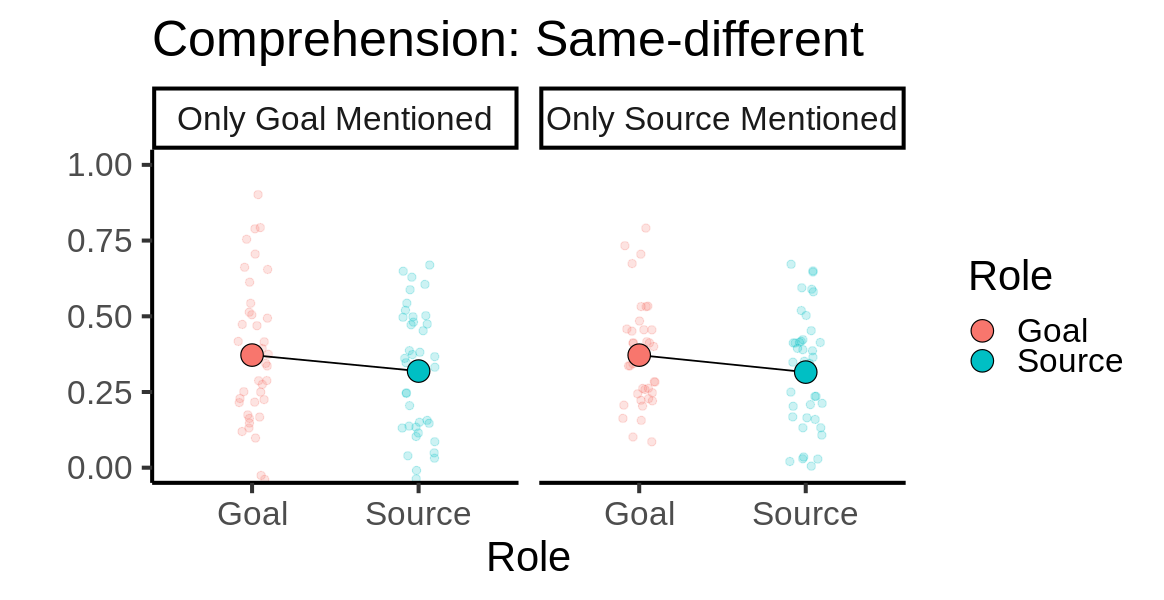

In [143]:
options(repr.plot.width = 9.7, repr.plot.height = 5)
accuracy_by_mentioned %>% 
ggplot(aes(Role, accuracy)) +
facet_wrap(.~audio_prompt)+
geom_point(aes(color = Role), position = position_jitter(0.1), size = 2, alpha = 0.2)+
stat_summary(fun="mean", geom="path", aes(group=1))+
stat_summary(aes(fill = Role), fun = "mean",  geom = "point", size = 6, shape = 21, color = "black")    +
coord_cartesian(ylim = c(0,1))+
labs(x="Role", y = "", title = "Comprehension: Same-different")

In [144]:
contrasts(memory_and_comprehension$Change_type.fct) = contr.sum(2)
contrasts(memory_and_comprehension$change_role_mentioned.fct) = contr.sum(2)
m<- glmer(Correct ~ Change_type.fct * change_role_mentioned.fct + (1 + Change_type.fct + change_role_mentioned.fct|participant) + (1|Event_type) , family = "binomial", 
data = memory_and_comprehension, control = glmerControl(optimizer= "nloptwrap", optCtrl=list(maxfun=2e7)))
summary(m)

Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.00457168 (tol = 0.002, component 1)”


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Correct ~ Change_type.fct * change_role_mentioned.fct + (1 +  
    Change_type.fct + change_role_mentioned.fct | participant) +  
    (1 | Event_type)
   Data: memory_and_comprehension
Control: glmerControl(optimizer = "nloptwrap", optCtrl = list(maxfun = 2e+07))

     AIC      BIC   logLik deviance df.resid 
  1577.6   1634.0   -777.8   1555.6     1237 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.8884 -0.7038 -0.5347  1.0303  2.5576 

Random effects:
 Groups      Name                       Variance Std.Dev. Corr       
 participant (Intercept)                0.08382  0.2895              
             Change_type.fct1           0.05079  0.2254   -0.20      
             change_role_mentioned.fct1 0.21880  0.4678    0.44  0.79
 Event_type  (Intercept)                0.19601  0.4427              
Number of obs: 1248, groups:  participant,

#  Experiment 3b: Comprehension Forced-Choice




In [145]:
memory_comprehension_FC <- read_csv('memory_comprehension_FC.csv')

Rows: 1120 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): exp, Phase, viewingList, Event_Type, Choice, Answer, Event_type
dbl (5): Trial_number, participant, Correct, Source_Correct, Goal_Correct

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [146]:
#calculate appendix
appendix_3b <- memory_comprehension_FC %>% 
# select (Phase, viewingList, Event_Type, Event_type,  Value, Answer, Correct, Source_Correct, Goal_Correct) %>%
mutate (Type = ifelse(Correct == 1, "Both Correct", ifelse(Source_Correct ==1, "Source Correct", ifelse(Goal_Correct==1, "Goal Correct", "Neither Correct"))))
appendix_3b %>% filter (Event_Type == "Critical") %>% mutate(n=n()) %>% group_by(Type) %>% summarize(n = n(), percent = n/640*100)%>% kable



|Type            |   n|  percent|
|:---------------|---:|--------:|
|Both Correct    | 277| 43.28125|
|Goal Correct    | 130| 20.31250|
|Neither Correct |  84| 13.12500|
|Source Correct  | 149| 23.28125|

In [147]:
memory_comprehension_FC_longer <- memory_comprehension_FC %>% 
filter(Event_Type == "Critical") %>% 
pivot_longer(c(Source_Correct, Goal_Correct), names_to = "role", values_to = "Is_correct") %>%
mutate(Role = ifelse(role == "Source_Correct", "Source", "Goal")) 

In [148]:
# recover which trial gets Source-only prompts and which trilas gets Goal-only prompts
memory_comprehension_FC_longer$prompt_1 <- rep(c("Source", "Source", "Goal", "Goal", "Goal", "Goal", "Source", "Source", "Source", "Source", "Source", "Source", "Goal", "Goal", "Source", "Source", "Source", "Source", "Goal", "Goal","Goal", "Goal", "Source", "Source", "Goal","Goal", "Source", "Source", "Goal", "Goal","Goal", "Goal"), len= 1280) 
memory_comprehension_FC_longer$prompt_2 <- ifelse(memory_comprehension_FC_longer$prompt_1 == "Source", "Goal", "Source")
memory_comprehension_FC_longer$audio_prompt <- ifelse(memory_comprehension_FC_longer$viewingList == "viewing11"| memory_comprehension_FC_longer$viewingList == "viewing21", memory_comprehension_FC_longer$prompt_1, memory_comprehension_FC_longer$prompt_2)

In [149]:
memory_comprehension_FC_longer<- memory_comprehension_FC_longer %>% 
mutate(Role_fact=factor(Role, levels= c("Goal", "Source"))) %>%
mutate(Audio_fact=factor(audio_prompt, levels= c("Goal", "Source")))

In [150]:
accuracy_by_participant_3b <- memory_comprehension_FC_longer %>% group_by(exp, participant, Role) %>% summarize(n=n(), accuracy = sum(Is_correct,na.rm = TRUE)/n) 
accuracy_by_participant_3b %>% kable

`summarise()` has grouped output by 'exp', 'participant'. You can override
using the `.groups` argument.




|exp   | participant|Role   |  n| accuracy|
|:-----|-----------:|:------|--:|--------:|
|exp3b |           1|Goal   | 16|   0.6875|
|exp3b |           1|Source | 16|   0.9375|
|exp3b |           2|Goal   | 16|   0.6875|
|exp3b |           2|Source | 16|   0.7500|
|exp3b |           3|Goal   | 16|   0.5000|
|exp3b |           3|Source | 16|   0.8750|
|exp3b |           4|Goal   | 16|   0.7500|
|exp3b |           4|Source | 16|   0.6875|
|exp3b |           5|Goal   | 16|   0.5000|
|exp3b |           5|Source | 16|   0.6875|
|exp3b |           6|Goal   | 16|   0.7500|
|exp3b |           6|Source | 16|   0.5625|
|exp3b |           7|Goal   | 16|   0.7500|
|exp3b |           7|Source | 16|   0.8125|
|exp3b |           8|Goal   | 16|   0.5000|
|exp3b |           8|Source | 16|   0.5625|
|exp3b |           9|Goal   | 16|   0.6875|
|exp3b |           9|Source | 16|   1.0000|
|exp3b |          10|Goal   | 16|   0.7500|
|exp3b |          10|Source | 16|   0.6875|
|exp3b |          11|Goal   | 

In [151]:
accuracy_comprehension_FC_long <- memory_comprehension_FC_longer %>% group_by(Phase, participant, Role,audio_prompt) %>% summarize(n=n(), accuracy = sum(Is_correct,na.rm = TRUE)/n) 
accuracy_comprehension_FC_long %>% kable

`summarise()` has grouped output by 'Phase', 'participant', 'Role'. You can
override using the `.groups` argument.




|Phase   | participant|Role   |audio_prompt |  n| accuracy|
|:-------|-----------:|:------|:------------|--:|--------:|
|memory1 |           1|Goal   |Goal         |  8|    0.750|
|memory1 |           1|Goal   |Source       |  8|    0.625|
|memory1 |           1|Source |Goal         |  8|    1.000|
|memory1 |           1|Source |Source       |  8|    0.875|
|memory1 |           2|Goal   |Goal         |  8|    0.750|
|memory1 |           2|Goal   |Source       |  8|    0.625|
|memory1 |           2|Source |Goal         |  8|    0.625|
|memory1 |           2|Source |Source       |  8|    0.875|
|memory1 |           3|Goal   |Goal         |  8|    0.375|
|memory1 |           3|Goal   |Source       |  8|    0.625|
|memory1 |           3|Source |Goal         |  8|    0.875|
|memory1 |           3|Source |Source       |  8|    0.875|
|memory1 |           4|Goal   |Goal         |  8|    0.625|
|memory1 |           4|Goal   |Source       |  8|    0.875|
|memory1 |           4|Source |Goal   

In [152]:
facet_names <- c(
                    Goal = "Only Goal Mentioned",
                    Source = "Only Source Mentioned"
                    )

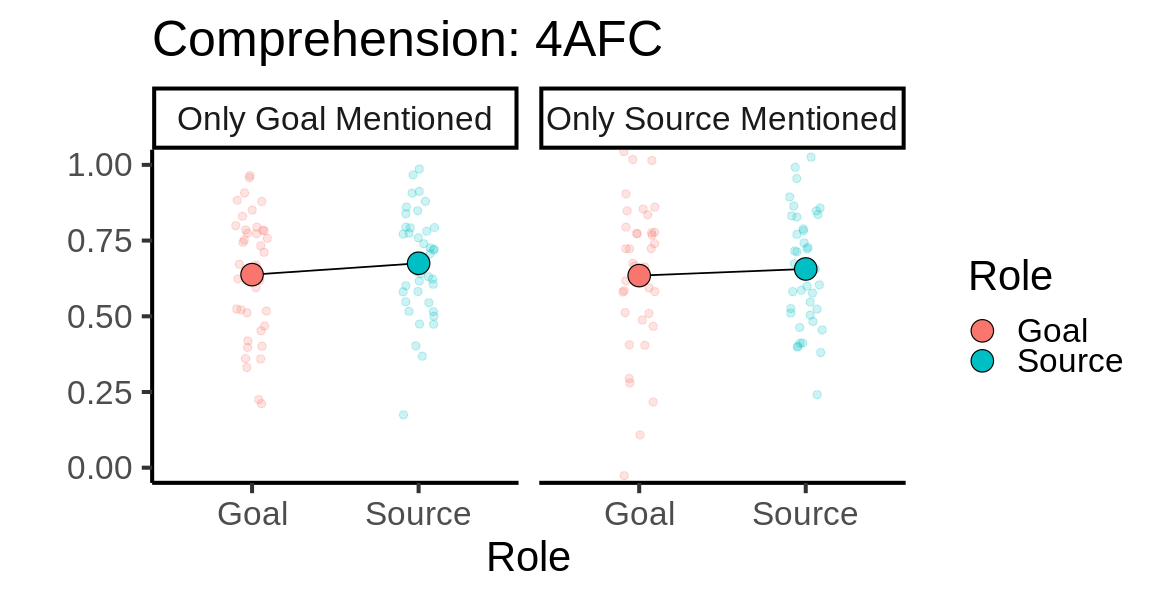

In [153]:
options(repr.plot.width = 9.7, repr.plot.height = 5)
accuracy_comprehension_FC_long %>% 
ggplot(aes(Role, accuracy)) +
facet_wrap(.~audio_prompt, labeller = as_labeller(facet_names))+
geom_point(aes(color = Role), position = position_jitter(0.1), size = 2, alpha = 0.2)+
stat_summary(fun="mean", geom="path", aes(group=1)) +
stat_summary(aes(fill = Role), fun = "mean",  geom = "point", size = 6, shape = 21, color = "black")    +
coord_cartesian(ylim = c(0,1))+
labs(x="Role", y = "", title = "Comprehension: 4AFC")

In [154]:
contrasts(memory_comprehension_FC_longer$Audio_fact) <- contr.sum(2)
contrasts(memory_comprehension_FC_longer$Role_fact) <- contr.sum(2)
m<- glmer(Is_correct ~ Role_fact*Audio_fact + (1+Role_fact|participant) + (1+Role_fact+Audio_fact|Event_type) , family = "binomial", data = memory_comprehension_FC_longer)
summary(m)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Is_correct ~ Role_fact * Audio_fact + (1 + Role_fact | participant) +  
    (1 + Role_fact + Audio_fact | Event_type)
   Data: memory_comprehension_FC_longer

     AIC      BIC   logLik deviance df.resid 
  1635.7   1702.7   -804.9   1609.7     1267 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.1854 -1.0518  0.5562  0.7053  1.4435 

Random effects:
 Groups      Name        Variance Std.Dev. Corr     
 participant (Intercept) 0.26537  0.5151            
             Role_fact1  0.02831  0.1683   0.67     
 Event_type  (Intercept) 0.03125  0.1768            
             Role_fact1  0.12501  0.3536   0.11     
             Audio_fact1 0.01066  0.1032   0.31 0.12
Number of obs: 1280, groups:  participant, 40; Event_type, 16

Fixed effects:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)             0.68510    0.1

# Experiment 4a: Viewing Same-Different Circled


In [157]:
memory_circled <- read.csv("memory_circled.csv") %>% filter(Change_type != "No Change") %>%
mutate(Change_type.fct = as.factor(Change_type))  

In [158]:
accuracy_by_type_circled <- memory_circled %>% filter(Change_type != "No Change") %>% group_by( participant, Phase, Change_type) %>% 
summarize(n=n(), n_correct = sum(Correct), accuracy = sum(n_correct/n)) %>%
mutate(Role= ifelse(Change_type == "Goal Change", "Goal", "Source"))
accuracy_by_type_circled %>% kable

`summarise()` has grouped output by 'participant', 'Phase'. You can override
using the `.groups` argument.




| participant|Phase    |Change_type   |  n| n_correct| accuracy|Role   |
|-----------:|:--------|:-------------|--:|---------:|--------:|:------|
|           1|memory11 |Goal Change   |  8|         2|    0.250|Goal   |
|           1|memory11 |Source Change |  8|         2|    0.250|Source |
|           2|memory11 |Goal Change   |  8|         4|    0.500|Goal   |
|           2|memory11 |Source Change |  8|         5|    0.625|Source |
|           3|memory11 |Goal Change   |  8|         1|    0.125|Goal   |
|           3|memory11 |Source Change |  8|         4|    0.500|Source |
|           4|memory11 |Goal Change   |  8|         4|    0.500|Goal   |
|           4|memory11 |Source Change |  8|         7|    0.875|Source |
|           5|memory11 |Goal Change   |  8|         5|    0.625|Goal   |
|           5|memory11 |Source Change |  8|         3|    0.375|Source |
|           6|memory11 |Goal Change   |  8|         4|    0.500|Goal   |
|           6|memory11 |Source Change |  8|      

In [159]:
accuracy_by_type_circled %>% group_by(Role) %>% summarise(mean= mean(accuracy), sd= sd(accuracy)) %>% kable



|Role   |      mean|        sd|
|:------|---------:|---------:|
|Goal   | 0.5721154| 0.2220763|
|Source | 0.4839744| 0.2386710|

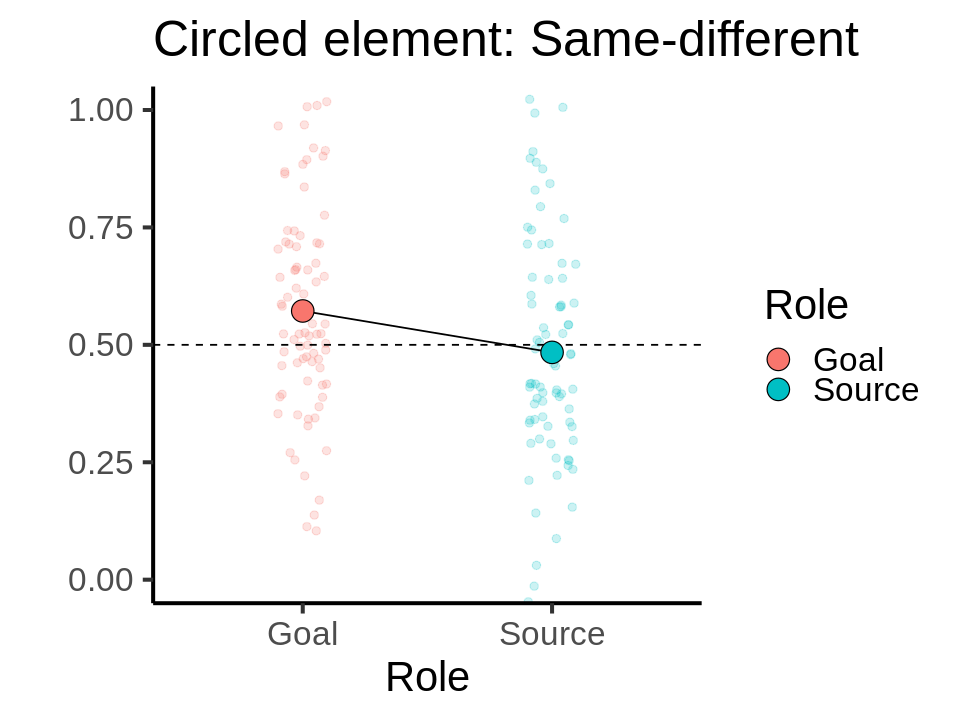

In [160]:
options(repr.plot.width = 8, repr.plot.height = 6)
accuracy_by_type_circled %>% 
ggplot(aes(Role, accuracy)) +
geom_point(aes(color = Role), position = position_jitter(0.1), size = 2, alpha = 0.2)+
geom_hline(yintercept = 0.5, linetype = 2)+
stat_summary(fun="mean", geom="path", aes(group=1))+
stat_summary(aes(fill = Role), fun = "mean",  geom = "point", size = 6, shape = 21, color = "black")    +
coord_cartesian(ylim = c(0,1))+
labs(x="Role", y = "", title = "Circled element: Same-different")

In [161]:
contrasts(memory_circled$Change_type.fct) = contr.sum(2)
m<- glmer(Correct ~ Change_type.fct + (1 + Change_type.fct|participant) + (1 |Event_type) , family = "binomial", data = memory_circled)
summary(m)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Correct ~ Change_type.fct + (1 + Change_type.fct | participant) +  
    (1 | Event_type)
   Data: memory_circled

     AIC      BIC   logLik deviance df.resid 
  1669.9   1700.6   -828.9   1657.9     1242 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.4635 -0.8898  0.5028  0.8414  1.8005 

Random effects:
 Groups      Name             Variance Std.Dev. Corr 
 participant (Intercept)      0.47554  0.6896        
             Change_type.fct1 0.03228  0.1797   -0.32
 Event_type  (Intercept)      0.12542  0.3541        
Number of obs: 1248, groups:  participant, 78; Event_type, 16

Fixed effects:
                 Estimate Std. Error z value Pr(>|z|)   
(Intercept)       0.12868    0.13293   0.968  0.33306   
Change_type.fct1  0.19924    0.06434   3.097  0.00196 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlatio

# Experiment 4b: Viewing Same-Different Background 


In [162]:
memory_background <- read.csv("memory_background.csv")%>% 
filter(Change_type != "No Change") %>%
mutate(Change_type.fct = as.factor(Change_type))

In [163]:
accuracy_by_type <- memory_background %>% filter(Change_type != "No Change") %>% group_by(participant, Phase, Change_type) %>% 
summarize(n=n(), n_correct = sum(Correct), accuracy = sum(n_correct/n)) %>%
mutate(Role= ifelse(Change_type == "Goal Change", "Goal", "Source"))
accuracy_by_type%>% kable

`summarise()` has grouped output by 'participant', 'Phase'. You can override
using the `.groups` argument.




| participant|Phase    |Change_type   |  n| n_correct| accuracy|Role   |
|-----------:|:--------|:-------------|--:|---------:|--------:|:------|
|           1|memory11 |Goal Change   |  8|         2|    0.250|Goal   |
|           1|memory11 |Source Change |  8|         6|    0.750|Source |
|           2|memory11 |Goal Change   |  8|         3|    0.375|Goal   |
|           2|memory11 |Source Change |  8|         2|    0.250|Source |
|           3|memory11 |Goal Change   |  8|         6|    0.750|Goal   |
|           3|memory11 |Source Change |  8|         5|    0.625|Source |
|           4|memory11 |Goal Change   |  8|         5|    0.625|Goal   |
|           4|memory11 |Source Change |  8|         3|    0.375|Source |
|           5|memory11 |Goal Change   |  8|         4|    0.500|Goal   |
|           5|memory11 |Source Change |  8|         3|    0.375|Source |
|           6|memory11 |Goal Change   |  8|         3|    0.375|Goal   |
|           6|memory11 |Source Change |  8|      

In [164]:
accuracy_by_type %>% group_by(Change_type) %>% summarize(mean = mean(accuracy), sd=sd(accuracy)) %>% kable



|Change_type   |      mean|        sd|
|:-------------|---------:|---------:|
|Goal Change   | 0.4651899| 0.2010955|
|Source Change | 0.3686709| 0.2069493|

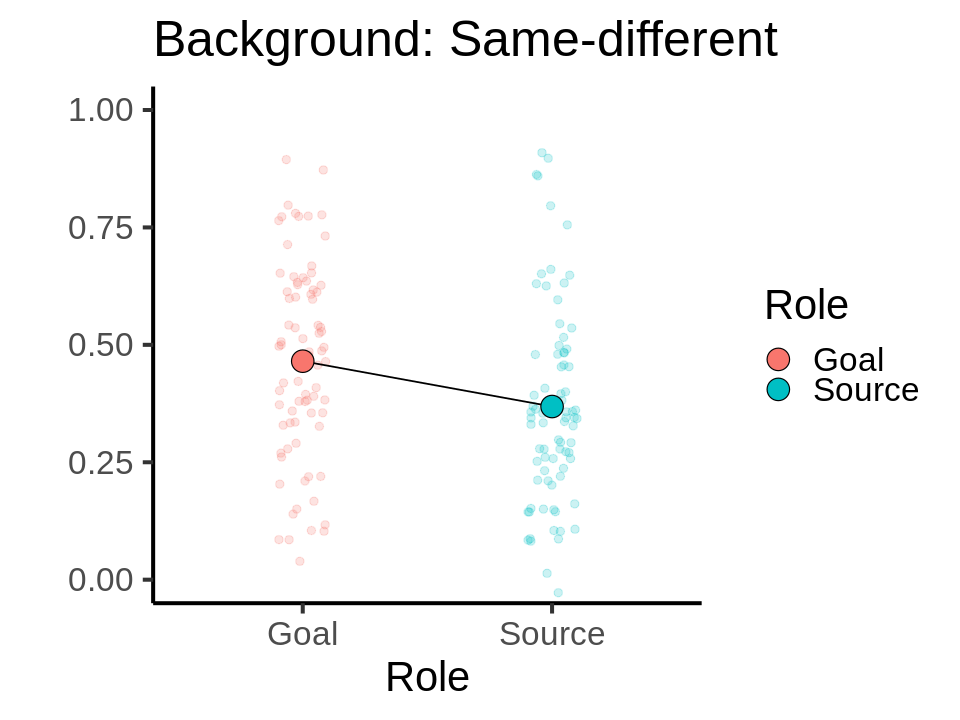

In [165]:
options(repr.plot.width = 8, repr.plot.height = 6)
accuracy_by_type %>% 
ggplot(aes(Role, accuracy)) +
geom_point(aes(color = Role), position = position_jitter(0.1), size = 2, alpha = 0.2)+
stat_summary(fun="mean", geom="path", aes(group=1))+
stat_summary(aes(fill = Role), fun = "mean",  geom = "point", size = 6, shape = 21, color = "black")    +
coord_cartesian(ylim = c(0,1))+
labs(x="Role", y = "", title = "Background: Same-different")

In [166]:
contrasts(memory_background$Change_type.fct) = contr.sum(2)
m<- glmer(Correct ~ Change_type.fct + (1 + Change_type.fct|participant) + (1 |Event_type) , family = "binomial", data = memory_background)
summary(m)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Correct ~ Change_type.fct + (1 + Change_type.fct | participant) +  
    (1 | Event_type)
   Data: memory_background

     AIC      BIC   logLik deviance df.resid 
  1656.4   1687.2   -822.2   1644.4     1258 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.1363 -0.7915 -0.5396  0.9542  2.1243 

Random effects:
 Groups      Name             Variance Std.Dev. Corr 
 participant (Intercept)      0.24930  0.4993        
             Change_type.fct1 0.03751  0.1937   -0.34
 Event_type  (Intercept)      0.28929  0.5379        
Number of obs: 1264, groups:  participant, 79; Event_type, 16

Fixed effects:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -0.38652    0.15825  -2.443 0.014586 *  
Change_type.fct1  0.23027    0.06515   3.535 0.000408 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Corr

# Graphs and comparisons across experiments

## Comparison between Experiment 1a & 4a

In [167]:
#combine 1a & 4a
memory_1a_4a <- memory_circled %>% rbind(memory_data_viewing_SD) %>% mutate(exp_factor = factor(exp, levels = c("exp1a", "exp4a")))
memory_1a_4a$participant_1a_4a <- rep(1:158, each=16)

In [168]:
# 1a & 4a comparison
contrasts(memory_1a_4a$Change_type.fct) = contr.sum(2)
contrasts(memory_1a_4a$exp_factor) = contr.sum(2)
m<- glmer(Correct ~ Change_type.fct * exp_factor + (1 + Change_type.fct |participant_1a_4a) + (1+ Change_type.fct |Event_type) , family = "binomial", data = memory_1a_4a )
summary(m)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Correct ~ Change_type.fct * exp_factor + (1 + Change_type.fct |  
    participant_1a_4a) + (1 + Change_type.fct | Event_type)
   Data: memory_1a_4a

     AIC      BIC   logLik deviance df.resid 
  3205.0   3263.4  -1592.5   3185.0     2518 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6418 -0.7477 -0.4444  0.8473  3.5770 

Random effects:
 Groups            Name             Variance Std.Dev. Corr 
 participant_1a_4a (Intercept)      0.48460  0.6961        
                   Change_type.fct1 0.05460  0.2337   -0.11
 Event_type        (Intercept)      0.23219  0.4819        
                   Change_type.fct1 0.02737  0.1654   0.09 
Number of obs: 2528, groups:  participant_1a_4a, 158; Event_type, 16

Fixed effects:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                  -0.30443    0.14002  -2.

## Comparison between Experiment 1a & 4b

In [169]:
#combine 1a & 4b
memory_1a_4b <- memory_background %>% rbind(memory_data_viewing_SD) %>% mutate(exp_factor = factor(exp, levels = c("exp1a", "exp4b")))
memory_1a_4b$participant_1a_4b <- rep(1:159, each=16)

In [170]:
# compare 1a & 4b
contrasts(memory_1a_4b$Change_type.fct) = contr.sum(2)
contrasts(memory_1a_4b$exp_factor) = contr.sum(2)
m<- glmer(Correct ~ Change_type.fct * exp_factor + (1 + Change_type.fct|participant_1a_4b) + (1 + Change_type.fct |Event_type) , family = "binomial", data = memory_1a_4b)
summary(m)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Correct ~ Change_type.fct * exp_factor + (1 + Change_type.fct |  
    participant_1a_4b) + (1 + Change_type.fct | Event_type)
   Data: memory_1a_4b

     AIC      BIC   logLik deviance df.resid 
  3190.9   3249.3  -1585.5   3170.9     2534 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.3325 -0.7256 -0.4906  0.9257  3.8516 

Random effects:
 Groups            Name             Variance Std.Dev. Corr 
 participant_1a_4b (Intercept)      0.35722  0.59768       
                   Change_type.fct1 0.05399  0.23236  -0.07
 Event_type        (Intercept)      0.31806  0.56397       
                   Change_type.fct1 0.00298  0.05459  0.84 
Number of obs: 2544, groups:  participant_1a_4b, 159; Event_type, 16

Fixed effects:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                  -0.56695    0.15561  -3.

## Figures

### Figure 3

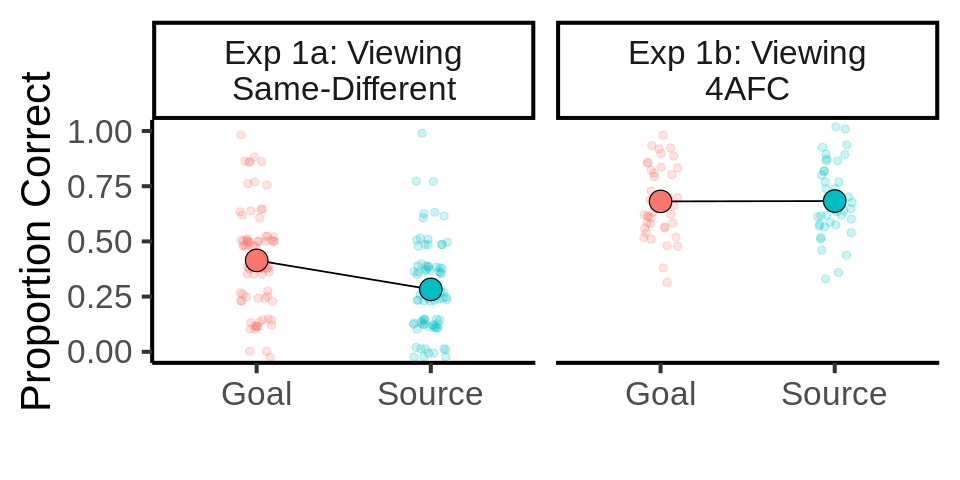

In [171]:
viewing <- accuracy_by_participant_1a %>% rbind (accuracy_by_participant_1b) %>% mutate(Exp = ifelse(exp == "exp1b", "Exp 1b: Viewing\n4AFC", "Exp 1a: Viewing\nSame-Different"))
options(repr.plot.width = 8, repr.plot.height = 4)
viewing %>% 
ggplot(aes(Role, accuracy)) +
facet_wrap(.~Exp)+
geom_point(aes(color = Role), position = position_jitter(0.1), size = 2, alpha = 0.2)+
stat_summary(fun="mean", geom="path", aes(group=1))+
stat_summary(aes(fill = Role), fun = "mean",  geom = "point", size = 6, shape = 21, color = "black")    +
coord_cartesian(ylim = c(0,1))+
labs(x="", y = "Proportion Correct")+
theme(legend.position='none')

### Figure 5

`summarise()` has grouped output by 'exp', 'participant'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'exp', 'participant'. You can override
using the `.groups` argument.


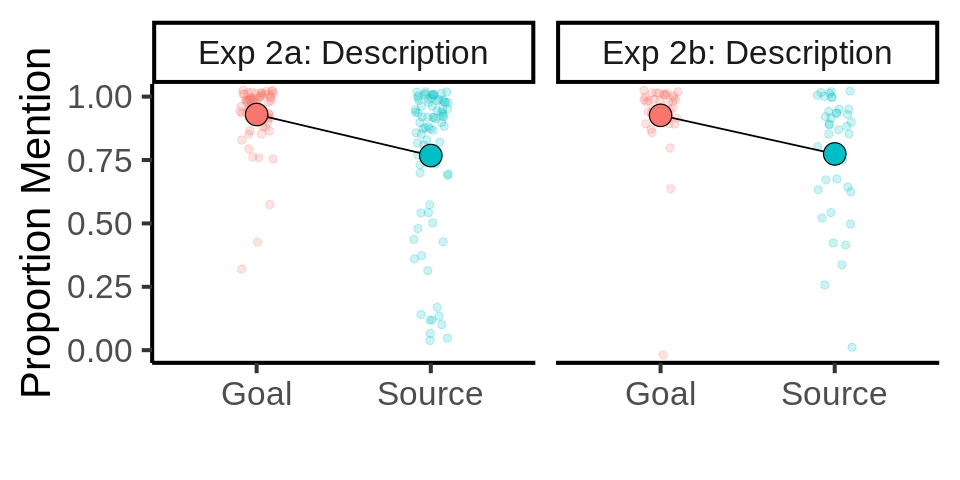

In [172]:
mentioned_by_participant_2a <- production_longer_2a %>% group_by(exp, participant, Role) %>% summarize(Rate = sum(Is_mentioned,na.rm = TRUE)/n())
mentioned_by_participant_2b <- production_longer_FC %>% group_by(exp, participant, Role) %>% summarize(Rate = sum(Is_mentioned,na.rm = TRUE)/n())
description <- mentioned_by_participant_2a %>% rbind(mentioned_by_participant_2b)%>%
mutate(ExpPhase = ifelse(exp == "exp2a", "Exp 2a: Description", "Exp 2b: Description"))

options(repr.plot.width = 8, repr.plot.height = 4)
description %>% 
ggplot(aes(Role, Rate)) +
facet_wrap(.~ExpPhase)+
geom_point(aes(color = Role), position = position_jitter(0.1), size = 2, alpha = 0.2)+
stat_summary(fun="mean", geom="path", aes(group=1))+
stat_summary(aes(fill = Role), fun = "mean",  geom = "point", size = 6, shape = 21, color = "black")    +
coord_cartesian(ylim = c(0,1))+
labs(x="", y = "Proportion Mention")+
theme(legend.position='none')

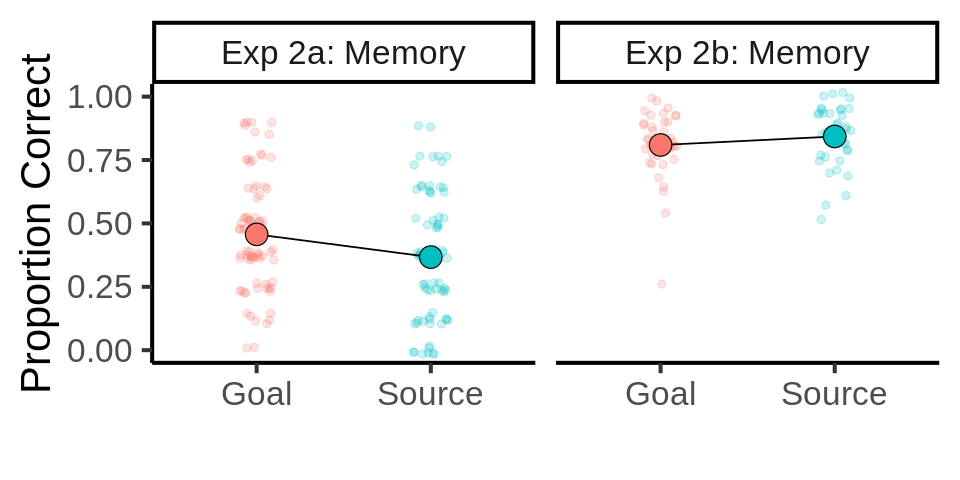

In [173]:
memory <- accuracy_by_participant_2a %>% rbind(accuracy_by_participant_2b) %>%
mutate(ExpPhase = ifelse(exp == "exp2a", "Exp 2a: Memory", "Exp 2b: Memory"))

options(repr.plot.width = 8, repr.plot.height = 4)
memory %>% 
ggplot(aes(Role, accuracy)) +
facet_wrap(.~ExpPhase)+
geom_point(aes(color = Role), position = position_jitter(0.1), size = 2, alpha = 0.2)+
stat_summary(fun="mean", geom="path", aes(group=1))+
stat_summary(aes(fill = Role), fun = "mean",  geom = "point", size = 6, shape = 21, color = "black")    +
coord_cartesian(ylim = c(0,1))+
labs(x="", y = "Proportion Correct")+
theme(legend.position='none')

### Figure 8

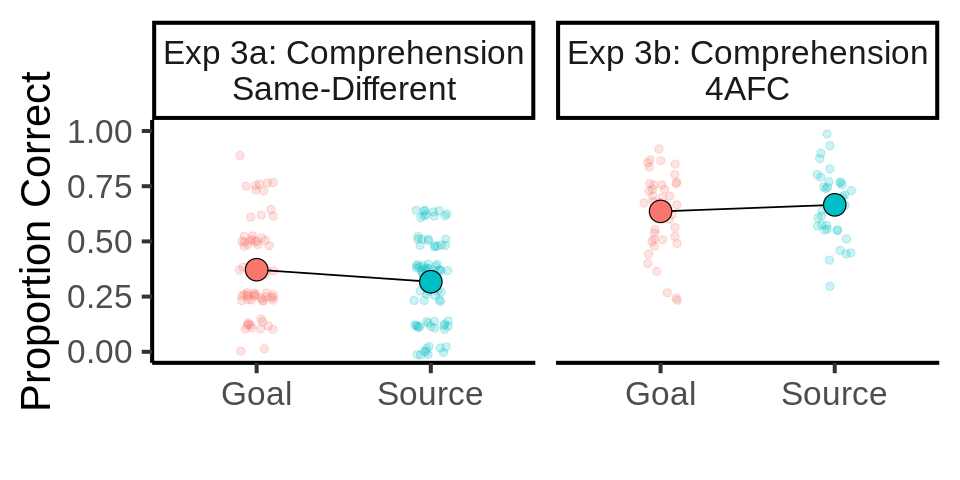

In [174]:
comprehension <- accuracy_by_participant_3a %>% rbind (accuracy_by_participant_3b) %>% mutate(Exp = ifelse(exp == "exp3b", "Exp 3b: Comprehension\n4AFC", "Exp 3a: Comprehension\nSame-Different"))
options(repr.plot.width = 8, repr.plot.height = 4)
comprehension %>% 
ggplot(aes(Role, accuracy)) +
facet_wrap(.~Exp)+
geom_point(aes(color = Role), position = position_jitter(0.1), size = 2, alpha = 0.2)+
stat_summary(fun="mean", geom="path", aes(group=1))+
stat_summary(aes(fill = Role), fun = "mean",  geom = "point", size = 6, shape = 21, color = "black")    +
coord_cartesian(ylim = c(0,1))+
labs(x="", y = "Proportion Correct")+
theme(legend.position='none')

### Figure 11

In [175]:
mean_participant_1a <- accuracy_by_participant_1a %>% group_by(exp, participant) %>% summarize(mean_accuracy = mean(accuracy)) %>%
mutate (group = ifelse (mean_accuracy > median(mean_accuracy), "high", "low"))
accuracy_viewing_SD_median_split <- accuracy_by_participant_1a %>% left_join(mean_participant_1a, by = c("participant", "exp")) 
# accuracy_viewing_SD_median_split %>% kable
mean_participant_1b <- accuracy_by_participant_1b %>% group_by(exp, participant) %>% summarize(mean_accuracy = mean(accuracy)) %>%
mutate (group = ifelse (mean_accuracy > median(mean_accuracy), "high", "low"))
accuracy_viewing_4AFC_median_split <- accuracy_by_participant_1b %>% left_join(mean_participant_1b, by = c("participant", "exp")) 

mean_participant_2a <- accuracy_by_participant_2a %>% group_by(exp, participant) %>% summarize(mean_accuracy = mean(accuracy)) %>%
mutate (group = ifelse (mean_accuracy > median(mean_accuracy), "high", "low"))
accuracy_production_SD_median_split <- accuracy_by_participant_2a %>% left_join(mean_participant_2a, by = c("participant", "exp")) 

mean_participant_2b <- accuracy_by_participant_2b %>% group_by(exp, participant) %>% summarize(mean_accuracy = mean(accuracy)) %>%
mutate (group = ifelse (mean_accuracy > median(mean_accuracy), "high", "low"))
accuracy_production_4AFC_median_split <- accuracy_by_participant_2b %>% left_join(mean_participant_2b, by = c("participant", "exp")) 

mean_participant_3a <- accuracy_by_participant_3a %>% group_by(exp, participant) %>% summarize(mean_accuracy = mean(accuracy)) %>%
mutate (group = ifelse (mean_accuracy > median(mean_accuracy), "high", "low"))
accuracy_comprehension_SD_median_split <- accuracy_by_participant_3a %>% left_join(mean_participant_3a, by = c("participant", "exp")) 

mean_participant_3b <- accuracy_by_participant_3b %>% group_by(exp, participant) %>% summarize(mean_accuracy = mean(accuracy)) %>%
mutate (group = ifelse (mean_accuracy > median(mean_accuracy), "high", "low"))
accuracy_comprehension_4AFC_median_split <- accuracy_by_participant_3b %>% left_join(mean_participant_3b, by = c("participant", "exp")) 

`summarise()` has grouped output by 'exp'. You can override using the `.groups`
argument.
`summarise()` has grouped output by 'exp'. You can override using the `.groups`
argument.
`summarise()` has grouped output by 'exp'. You can override using the `.groups`
argument.
`summarise()` has grouped output by 'exp'. You can override using the `.groups`
argument.
`summarise()` has grouped output by 'exp'. You can override using the `.groups`
argument.
`summarise()` has grouped output by 'exp'. You can override using the `.groups`
argument.


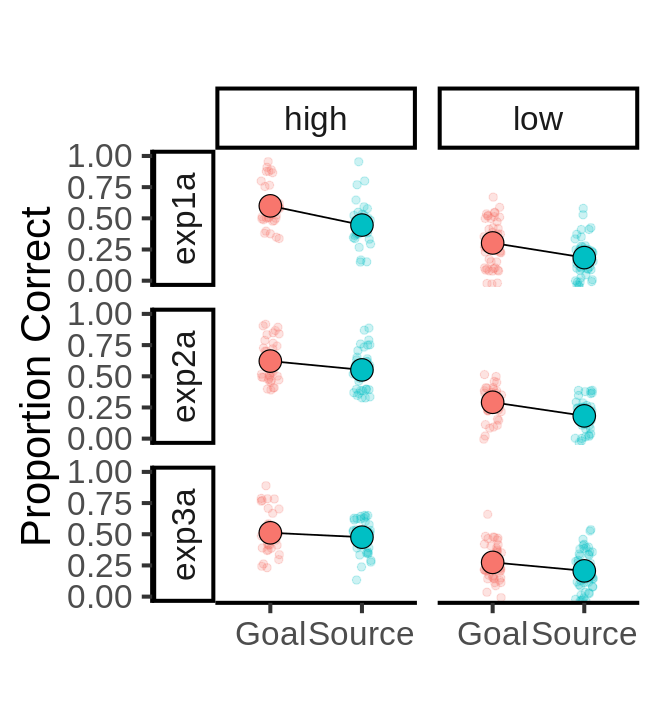

In [176]:
median_split_SD <- rbind(accuracy_viewing_SD_median_split, accuracy_production_SD_median_split, accuracy_comprehension_SD_median_split)
options(repr.plot.width = 5.5, repr.plot.height = 6)
median_split_SD %>% 
ggplot(aes(Role, accuracy)) +
# geom_bar(stat = "summary", position = position_dodge())+
facet_grid(exp~group, switch="y")+
# facet_wrap(.~Is_mentioned, labeller = as_labeller(facet_names))+
geom_point(aes(color = Role), position = position_jitter(0.1), size = 2, alpha = 0.2)+
# geom_line(aes(group = ID))+
# geom_hline(yintercept = 0, linetype = 2)+
# stat_summary(fun.data = mean_se,  geom = "errorbar", width = 0.2, size = 1, 
#                           position = position_dodge(0.9))    +
stat_summary(fun="mean", geom="path", aes(group=1))+
stat_summary(aes(fill = Role), fun = "mean",  geom = "point", size = 6, shape = 21, color = "black")    +
# geom_bar(stat = "identity", position = "dodge", width = 1, color="black", alpha =0.8)+
coord_cartesian(ylim = c(0,1))+
labs(x="", y = "Proportion Correct", title = "")+
theme(legend.position='none')

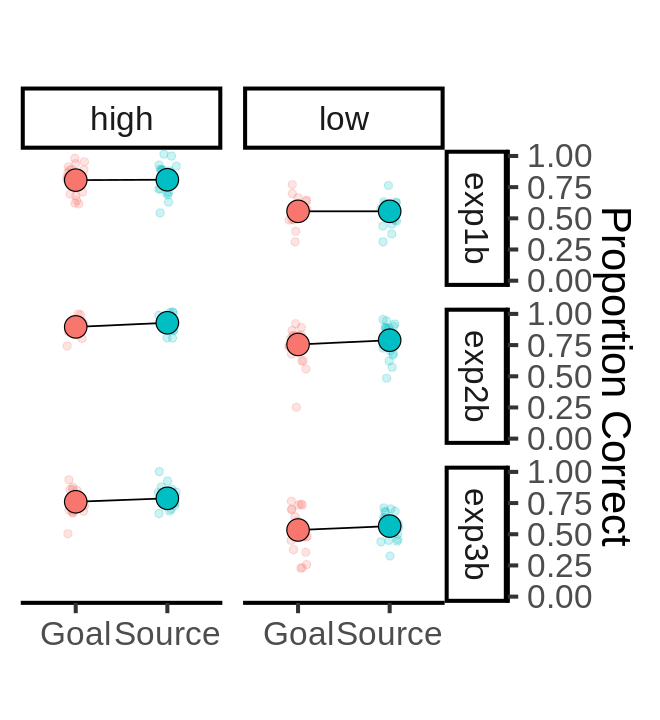

In [177]:
median_split_4AFC <- rbind(accuracy_viewing_4AFC_median_split, accuracy_production_4AFC_median_split, accuracy_comprehension_4AFC_median_split)
options(repr.plot.width = 5.5, repr.plot.height = 6)
median_split_4AFC %>% 
ggplot(aes(Role, accuracy)) +
facet_grid(exp~group)+
geom_point(aes(color = Role), position = position_jitter(0.1), size = 2, alpha = 0.2)+
stat_summary(fun="mean", geom="path", aes(group=1))+
stat_summary(aes(fill = Role), fun = "mean",  geom = "point", size = 6, shape = 21, color = "black")    +
coord_cartesian(ylim = c(0,1))+
labs(x="", y = "Proportion Correct", title = "")+
theme(legend.position='none')+
scale_y_continuous(position = "right")